# Using BGS World Mineral Statistics - OGCAPI-Features Endpoint

The BGS has recently started serving more data using API's, recognising more users want and need programatic access to data.

BGS is also committed to using international standards, including geospatial standards from the OGC and ISO, which we've done on the API for the World Mineral Statistic Data - utalising the OGC APU - Features standard.

## World mineral statistics data

The British Geological Survey (BGS) and its predecessor organisations have compiled production and trade statistics on a wide range of mineral commodities since 1913.

## Data availability

Currently this tool permits access to data from the World Mineral Statistics archive for the years 1970 to 2022. Prior to 1970 the data are available in PDF files which you can download for free from the main archive page. Selected data from 1960 are also available from the main archive as a static table in MS Excel.

For certain commodities data are not available for all years, for example the BGS commenced collation of data for primary aggregates in 1998 and consequently there are no data for earlier years for this particular commodity. Trade data (imports and exports) are available for all countries up to 2002, and for selected European countries only from 2003 to 2018.


| Year Range     | Import Data | Export Data | Geographic Extent |
|------------    |---------|---------| ----------------- |
| 1970 - 2002    | Yes     | Yes     | All Countries     |
| 1970 - 2018    | Yes     | Yes     | Selected Europe   |
| 1970 - Present | Yes     | Yes     | UK Only           |


## Setup

Installation / Import of required Libaries

In [172]:
!pip install OWSLib
!pip install folium

from owslib.ogcapi.features import Features
import requests
import folium
import json

## API Overview

In [173]:
## List all available data collections from the BGS OGC API Service:

bgs = Features('https://ogcapi.bgs.ac.uk/')
bgs.feature_collections()

['scanned-maps-1m',
 'scanned-maps-500k',
 'scanned-maps-250k',
 'bgsgeology625kbedrock',
 'bgsgeology625kdykes',
 'bgsgeology625kfaults',
 'bgsgeology625ksuperficial',
 'aeromag',
 'historicalearthquakes',
 'recentearthquakes',
 'landslideindex',
 'onshoreboreholeindex',
 'agsboreholeindex',
 'geomag-observatory-index',
 'offshore-survey-overview',
 'offshore-factor-map-bsl',
 'offshore-factor-map-qdsl',
 'offshore-factor-map-qdt',
 'offshore-core-sample-data',
 'offshore-sample-activity-data',
 'offshore-sample-geochemical-data',
 'offshore-sample-geological-data',
 'offshore-sample-geotechnical-data',
 'offshore-seabed-sediment-data',
 'offshore-oil-gas-site-surveys',
 'offshorebackscatterareas',
 'offshore-geophysical-survey-lines',
 'offshore-geophysical-survey-shot-points',
 'offshore-geophysical-data-magnetics',
 'offshore-geophysical-data-gravity',
 'offshore-sea-areas',
 'offshore-sea-data-bbox',
 'offshore-sea-doc-event-area',
 'offshore-sea-doc-event-line',
 'offshore-sea-do

In [174]:
## List metadata for a specific collection of data, in this case the BGS World Mineral Statistics

bgs.collection('world-mineral-statistics')

{'id': 'world-mineral-statistics',
 'title': 'BGS World Mineral Statistics',
 'description': 'Welcome to the World Mineral Statistics archive API. The British Geological Survey (BGS) and its predecessor organisations have compiled production and trade statistics on a wide range of mineral commodities since 1913. Currently this tool permits access to data from the World Mineral Statistics archive for the years 1970 to 2022. Prior to 1970 the data are available in PDF files which you can download for free from the main archive page. Selected data from 1960 are also available from the main archive as a static table in MS Excel. For certain commodities data are not available for all years, for example the BGS commenced collation of data for primary aggregates in 1998 and consequently there are no data for earlier years for this particular commodity. Trade data (imports and exports) are available for all countries up to 2002, and for selected European countries only from 2003 to 2018. Pleas

In [175]:
## Return the data for the first 2 items in the collection allowing you to review available properties and formats. This also includes the numberMatched and numberReturned parameters which is usful to understand how much data is available.

minstats = bgs.collection_items('world-mineral-statistics', limit=2)
minstats

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'quantity': 0.0,
    'bgs_commodity_code': 128.0,
    'units': 'kilograms (metal content)',
    'bgs_statistic_type_trans': 'Production',
    'bgs_commodity_trans': 'silver, mine',
    'concat_table_notes_code': None,
    'country_trans': 'Burkina Faso',
    'bgs_sub_commodity_trans': None,
    'concat_table_notes_text': None,
    'country_iso2_code': 'BF',
    'erml_group': 'Silver',
    'concat_figure_notes_code': None,
    'yearbook_table_trans': 'Mine production of silver',
    'country_iso3_code': 'BFA',
    'erml_commodity': 'Silver (mine production, metal content)',
    'concat_figure_notes_text': None,
    'yearbook_table_id': 128,
    'pole_of_inaccessibility_longitude': -0.901057,
    'erml_sub_commodity': 'Ores and concentrates (metal content)',
    'year': '2006-01-01',
    'pole_of_inaccessibility_latitude': 12.591396,
    'cgi_commodity_url': 'http://resource.geosciml.org/classifier/cgi/comm

# Commodities Available

There is a commodities endpoint to get a list of commodities available to search by:

In [176]:
params = {'f': 'json', 'limit': 200}
response = requests.get('https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics-commodities/items', params=params)
data = response.json()
data
commodities = []
commodities.append(gpd.GeoDataFrame.from_features(data['features']))
commodities = pd.concat(commodities)
commodities

,geometry,sort_id,commodity_list_trans,commodity_code
0,POINT (0.00000 0.00000),1.0,"aggregates, primary",177.0
1,POINT (0.00000 0.00000),2.0,alumina,2.0
2,POINT (0.00000 0.00000),3.0,"aluminium, primary",3.0
3,POINT (0.00000 0.00000),4.0,antimony,8.0
4,POINT (0.00000 0.00000),5.0,"antimony, mine",6.0
...,...,...,...,...
106,POINT (0.00000 0.00000),107.0,zinc,156.0
107,POINT (0.00000 0.00000),108.0,"zinc, mine",153.0
108,POINT (0.00000 0.00000),109.0,"zinc, slab",154.0
109,POINT (0.00000 0.00000),110.0,zirconium,159.0


# Gold Production in Australia

In this section we're going to request the Gold production data for Australia and plot this on a chart.

In [177]:
import geopandas as gpd
import pandas as pd
import branca.colormap as cm
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np

In [178]:
## Build the request for Australian Gold Production

params = {'f': 'json', 'limit': 60, 'filter': 'erml_group = "Gold" AND country_iso3_code = "AUS" AND bgs_statistic_type_trans = "Production"'}
response = requests.get('https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics/items', params=params)
data = response.json()
data
## Add this data to a dataframe
gold_aus = []
gold_aus.append(gpd.GeoDataFrame.from_features(data['features']))
gold_aus = pd.concat(gold_aus)
gold_aus.drop(['geometry', 'bgs_commodity_code', 'concat_table_notes_code', 'concat_table_notes_text', 'concat_figure_notes_code', 'bgs_sub_commodity_trans'], axis=1, inplace=True)
gold_aus.head()

,country_trans,country_iso2_code,erml_group,yearbook_table_id,country_iso3_code,erml_commodity,concat_figure_notes_text,pole_of_inaccessibility_longitude,erml_sub_commodity,bgs_statistic_type_trans,pole_of_inaccessibility_latitude,cgi_commodity_url,year,yearbook_table_trans,quantity,units,bgs_commodity_trans
0,Australia,AU,Gold,57,AUS,"Gold (mine production, metal production)",None,132.721356,Ores and concentrates (metal content),Production,-23.137734,http://resource.geosciml.org/classifier/cgi/co...,1970-01-01,Mine production of gold,19282.0,kilograms,"gold, mine"
1,Australia,AU,Gold,57,AUS,"Gold (mine production, metal production)",None,132.721356,Ores and concentrates (metal content),Production,-23.137734,http://resource.geosciml.org/classifier/cgi/co...,1971-01-01,Mine production of gold,20918.0,kilograms,"gold, mine"
2,Australia,AU,Gold,57,AUS,"Gold (mine production, metal production)",None,132.721356,Ores and concentrates (metal content),Production,-23.137734,http://resource.geosciml.org/classifier/cgi/co...,1972-01-01,Mine production of gold,23361.0,kilograms,"gold, mine"
3,Australia,AU,Gold,57,AUS,"Gold (mine production, metal production)",None,132.721356,Ores and concentrates (metal content),Production,-23.137734,http://resource.geosciml.org/classifier/cgi/co...,1973-01-01,Mine production of gold,17174.0,kilograms,"gold, mine"
4,Australia,AU,Gold,57,AUS,"Gold (mine production, metal production)",None,132.721356,Ores and concentrates (metal content),Production,-23.137734,http://resource.geosciml.org/classifier/cgi/co...,1974-01-01,Mine production of gold,15944.0,kilograms,"gold, mine"


In [179]:
total_production = gold_aus.groupby("year")["quantity"].sum()
total_production.index = pd.to_datetime(total_production.index, format="%Y-%m-%d")

# Convert the index to a Series
total_production.index = pd.Series(total_production.index)

# Apply strftime() to the Series
total_production.index = total_production.index.strftime("%Y")

print(total_production)

year
1970     19282.0
1971     20918.0
1972     23361.0
1973     17174.0
1974     15944.0
1975     16386.0
1976     15637.0
1977     19417.0
1978     20142.0
1979     18566.0
1980     17035.0
1981     18374.0
1982     26961.0
1983     30591.0
1984     40309.0
1985     58521.0
1986     75079.0
1987    110696.0
1988    156950.0
1989    203563.0
1990    242420.0
1991    235990.0
1992    243545.0
1993    247433.0
1994    254874.0
1995    253084.0
1996    289030.0
1997    314090.0
1998    310320.0
1999    299750.0
2000    296420.0
2001    280080.0
2002    266140.0
2003    282000.0
2004    259000.0
2005    262156.0
2006    246862.0
2007    247355.0
2008    215186.0
2009    223504.0
2010    256713.0
2011    258699.0
2012    250441.0
2013    267062.0
2014    271856.0
2015    277372.0
2016    290767.0
2017    292022.0
2018    313028.0
2019    325572.0
2020    327952.0
2021    307577.0
2022    302787.0
Name: quantity, dtype: float64


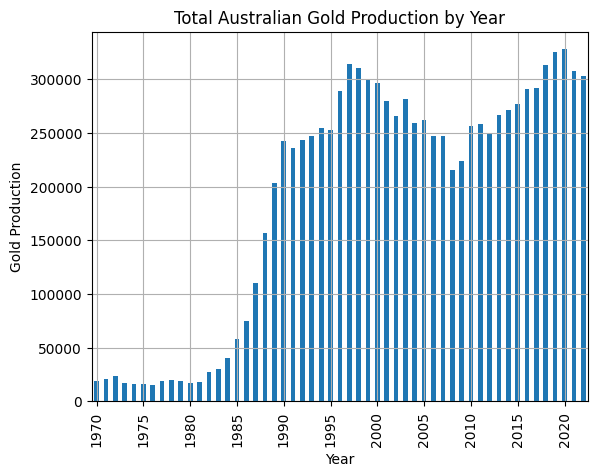

In [180]:
# prompt: Plot the quantity on a chart with year as the x axis

import matplotlib.ticker as mticker

total_production.plot.bar(title="Total Australian Gold Production by Year", grid=True)
plt.xlabel("Year")
plt.ylabel("Gold Production")
# Set x-axis ticks to every 5th year using a MultipleLocator
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

plt.show()


# Global Brown Coal Production

In this section we're going to request all production data for Brown Coal, combine the values for each country to get a total annual production and plot this on a chart.

In [181]:
params = {'f': 'json', 'limit': 13000, 'sortby': '-year', 'filter': 'bgs_commodity_trans = "coal" AND bgs_sub_commodity_trans = "Brown coal" AND bgs_statistic_type_trans = "Production"'}
response = requests.get('https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics/items', params=params)
data = response.json()
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'yearbook_table_id': 33,
    'country_iso2_code': 'AU',
    'erml_group': None,
    'concat_table_notes_text': None,
    'country_iso3_code': 'AUS',
    'erml_commodity': None,
    'concat_figure_notes_code': 'j',
    'pole_of_inaccessibility_longitude': 132.721356,
    'erml_sub_commodity': None,
    'concat_figure_notes_text': 'Years ended 30 June of that stated.',
    'pole_of_inaccessibility_latitude': -23.137734,
    'cgi_commodity_url': None,
    'quantity': 39126000.0,
    'yearbook_table_trans': 'Production of coal',
    'bgs_commodity_code': 35.0,
    'units': 'tonnes (metric)',
    'year': '2022-01-01',
    'bgs_statistic_type_trans': 'Production',
    'bgs_commodity_trans': 'coal',
    'concat_table_notes_code': None,
    'country_trans': 'Australia',
    'bgs_sub_commodity_trans': 'Brown coal'},
   'id': '1-262-612-33-2022',
   'geometry': {'type': 'Point',
    'coordinates': [132.721356000000

In [182]:
coal_world = []
coal_world.append(gpd.GeoDataFrame.from_features(data['features']))
coal_world = pd.concat(coal_world)
coal_world

,geometry,yearbook_table_id,country_iso2_code,erml_group,concat_table_notes_text,country_iso3_code,erml_commodity,concat_figure_notes_code,pole_of_inaccessibility_longitude,erml_sub_commodity,...,quantity,yearbook_table_trans,bgs_commodity_code,units,year,bgs_statistic_type_trans,bgs_commodity_trans,concat_table_notes_code,country_trans,bgs_sub_commodity_trans
0,POINT (132.72136 -23.13773),33,AU,None,None,AUS,None,j,132.721356,None,...,39126000.0,Production of coal,35.0,tonnes (metric),2022-01-01,Production,coal,None,Australia,Brown coal
1,POINT (21.06912 43.76936),33,RS,None,None,SRB,None,None,21.069123,None,...,233000.0,Production of coal,35.0,tonnes (metric),2022-01-01,Production,coal,None,Serbia,Brown coal
2,POINT (23.84019 42.73327),33,BG,None,None,BGR,None,None,23.840188,None,...,720000.0,Production of coal,35.0,tonnes (metric),2022-01-01,Production,coal,None,Bulgaria,Brown coal
3,POINT (19.23850 42.78582),33,ME,None,None,MNE,None,None,19.238500,None,...,0.0,Production of coal,35.0,tonnes (metric),2022-01-01,Production,coal,None,Montenegro,Brown coal
4,POINT (19.48038 48.70493),33,SK,None,None,SVK,None,None,19.480382,None,...,725000.0,Production of coal,35.0,tonnes (metric),2022-01-01,Production,coal,None,Slovakia,Brown coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,POINT (7.10000 50.73333),33,DE,None,None,DEU,None,r,7.100000,None,...,107767897.0,Production of coal,35.0,tonnes (metric),1970-01-01,Production,coal,None,German Federal Republic,Brown coal
425,POINT (14.41660 50.08333),33,CS,None,None,CSK,None,None,14.416600,None,...,78007000.0,Production of coal,35.0,tonnes (metric),1970-01-01,Production,coal,None,Czechoslovakia,Brown coal
426,POINT (20.33587 47.15529),33,HU,None,None,HUN,None,None,20.335869,None,...,19008000.0,Production of coal,35.0,tonnes (metric),1970-01-01,Production,coal,None,Hungary,Brown coal
427,POINT (132.72136 -23.13773),33,AU,None,None,AUS,None,None,132.721356,None,...,24175000.0,Production of coal,35.0,tonnes (metric),1970-01-01,Production,coal,None,Australia,Brown coal


In [183]:
total_production = coal_world.groupby("year")["quantity"].sum()
total_production.index = pd.to_datetime(total_production.index, format="%Y-%m-%d")

# Convert the index to a Series
total_production.index = pd.Series(total_production.index)

# Apply strftime() to the Series
total_production.index = total_production.index.strftime("%Y")

print(total_production)

year
1970    534989726.0
1971    535796390.0
1972    529238820.0
1973    528068225.0
1974    541765350.0
1975    537284000.0
1976    562962000.0
1977    561359014.0
1978    548933627.0
1979    575218758.0
1980    574721167.0
1981    584823295.0
1982    600530868.0
1983    604331828.0
1984    636374866.0
1985    653498829.0
1986    657341998.0
1987    660486262.0
1988    657949934.0
1989    647102071.0
1990    577056685.0
1991    332085700.0
1992    376700365.0
1993    349208512.0
1994    327652170.0
1995    312621179.0
1996    311651684.0
1997    304272769.0
1998    293765429.0
1999    282583847.0
2000    295411427.0
2001    300547500.0
2002    305632493.0
2003    304254849.0
2004    305040240.0
2005    300901210.0
2006    299942629.0
2007    302063371.0
2008    295600188.0
2009    289655968.0
2010    287920553.0
2011    296346409.0
2012    304311113.0
2013    288855173.0
2014    279607348.0
2015    281605959.0
2016    274182411.0
2017    271242041.0
2018    253651735.0
2019    2139363

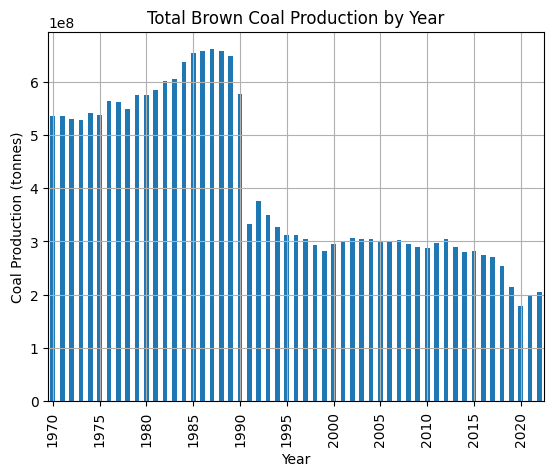

In [184]:
import matplotlib.ticker as mticker

total_production.plot.bar(title="Total Brown Coal Production by Year", grid=True)
plt.xlabel("Year")
plt.ylabel("Coal Production (tonnes)")
# Set x-axis ticks to every 5th year using a MultipleLocator
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

plt.show()

# Global Lithium Minerals Production

In [185]:
params = {'f': 'json', 'limit': 13000, 'sortby': '-year', 'filter': 'bgs_commodity_trans = "lithium minerals" AND bgs_statistic_type_trans = "Production"'}
response = requests.get('https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics/items', params=params)
data = response.json()
data
## Add this data to a dataframe
lith_data = []
lith_data.append(gpd.GeoDataFrame.from_features(data['features']))
lith_data = pd.concat(lith_data)
lith_data.drop(['geometry', 'bgs_commodity_code'], axis=1, inplace=True)
lith_data

,country_trans,bgs_sub_commodity_trans,concat_table_notes_text,country_iso2_code,erml_group,concat_figure_notes_code,yearbook_table_id,country_iso3_code,erml_commodity,concat_figure_notes_text,...,bgs_statistic_type_trans,pole_of_inaccessibility_latitude,cgi_commodity_url,year,yearbook_table_trans,quantity,units,bgs_commodity_trans,concat_table_notes_code,shape
0,Chile,Chloride,None,CL,None,None,84,CHL,None,None,...,Production,-26.162883,None,2022-01-01,Production of lithium minerals,0.0,tonnes (metric),lithium minerals,None,NaN
1,Namibia,Lithium minerals (Li content),None,NA,None,None,84,NAM,None,None,...,Production,-20.703654,None,2022-01-01,Production of lithium minerals,951.0,tonnes (metric),lithium minerals,None,NaN
2,Brazil,Lithium minerals (Li content),None,BR,None,None,84,BRA,None,None,...,Production,-12.408957,None,2022-01-01,Production of lithium minerals,3652.0,tonnes (metric),lithium minerals,None,NaN
3,Argentina,Carbonate,None,AR,Lithium,*,84,ARG,Lithium,Estimates.,...,Production,-31.841561,http://resource.geosciml.org/classifier/cgi/co...,2022-01-01,Production of lithium minerals,50000.0,tonnes (metric),lithium minerals,None,NaN
4,Chile,Carbonate,None,CL,Lithium,None,84,CHL,Lithium,None,...,Production,-26.162883,http://resource.geosciml.org/classifier/cgi/co...,2022-01-01,Production of lithium minerals,201950.0,tonnes (metric),lithium minerals,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Brazil,Lepidolite,None,BR,Lithium,None,84,BRA,Lithium minerals,None,...,Production,-12.408957,http://resource.geosciml.org/classifier/cgi/co...,1974-01-01,Production of lithium minerals,460.0,tonnes (metric),lithium minerals,None,NaN
812,Argentina,None,None,AR,Lithium,None,84,ARG,Lithium minerals,None,...,Production,-31.841561,http://resource.geosciml.org/classifier/cgi/co...,1974-01-01,Production of lithium minerals,164.0,tonnes (metric),lithium minerals,None,NaN
813,China,None,None,CN,Lithium,*,84,CHN,Lithium minerals,Estimates.,...,Production,32.216659,http://resource.geosciml.org/classifier/cgi/co...,1974-01-01,Production of lithium minerals,9000.0,tonnes (metric),lithium minerals,None,NaN
814,Soviet Union,None,None,SU,Lithium,*,84,SUN,Lithium minerals,Estimates.,...,Production,55.510000,http://resource.geosciml.org/classifier/cgi/co...,1974-01-01,Production of lithium minerals,45000.0,tonnes (metric),lithium minerals,None,NaN


In [186]:
# Group by both 'year' and 'country' and sum the 'quantity'
grouped_data = lith_data.groupby(["year", "country_trans"])["quantity"].sum()

# Reset the index to have 'year' and 'country' as columns
grouped_data = grouped_data.reset_index()

# Rename the 'level_2' column to 'country' (if needed)
grouped_data = grouped_data.rename(columns={"level_2": "country"})

# Assuming 'year' is a string column
grouped_data["year"] = pd.to_datetime(grouped_data["year"], format="%Y-%m-%d")

# Extract the year in YYYY format
grouped_data["year"] = grouped_data["year"].dt.strftime("%Y")

print(grouped_data)

     year country_trans  quantity
0    1974     Argentina     164.0
1    1974        Brazil    5400.0
2    1974         China    9000.0
3    1974       Namibia   37762.0
4    1974      Portugal    1200.0
..    ...           ...       ...
507  2022       Namibia  326351.0
508  2022       Nigeria     132.0
509  2022      Portugal   19132.0
510  2022           USA    2440.0
511  2022      Zimbabwe   87972.0

[512 rows x 3 columns]


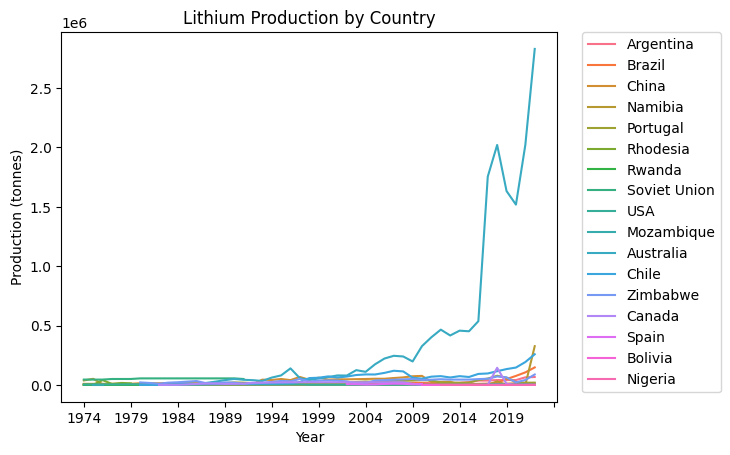

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot
sns.lineplot(x="year", y="quantity", hue="country_trans", data=grouped_data)

plt.title("Lithium Production by Country")
plt.xlabel("Year")
plt.ylabel("Production (tonnes)")
plt.legend(title="Country")
# Place legend outside the chart on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Set x-axis ticks to every 5th year
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

# Lithium Imports After 2010

In [188]:
params = {'f': 'json', 'limit': 13000, 'sortby': '-year', 'filter': 'bgs_commodity_trans = "lithium" AND bgs_statistic_type_trans = "Imports" AND year AFTER 2010-01-01T00:00:00Z'}
response = requests.get('https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics/items', params=params)
data = response.json()
data
## Add this data to a dataframe
lith_data = []
lith_data.append(gpd.GeoDataFrame.from_features(data['features']))
lith_data = pd.concat(lith_data)
lith_data.drop(['geometry', 'bgs_commodity_code'], axis=1, inplace=True)
lith_data

,country_trans,bgs_sub_commodity_trans,concat_table_notes_text,country_iso2_code,erml_group,concat_figure_notes_code,yearbook_table_id,country_iso3_code,erml_commodity,concat_figure_notes_text,...,erml_sub_commodity,bgs_statistic_type_trans,pole_of_inaccessibility_latitude,cgi_commodity_url,year,yearbook_table_trans,quantity,units,bgs_commodity_trans,concat_table_notes_code
0,United Kingdom,Carbonate,None,GB,Lithium,None,86,GBR,Lithium,None,...,Carbonate,Imports,55.000000,http://resource.geosciml.org/classifier/cgi/co...,2022-01-01,Imports of lithium,2883.0,tonnes (metric),lithium,None
1,United Kingdom,Oxides,None,GB,Lithium,None,86,GBR,Lithium,None,...,Oxides,Imports,55.000000,http://resource.geosciml.org/classifier/cgi/co...,2022-01-01,Imports of lithium,1069.0,tonnes (metric),lithium,None
2,United Kingdom,Oxides,None,GB,Lithium,None,86,GBR,Lithium,None,...,Oxides,Imports,55.000000,http://resource.geosciml.org/classifier/cgi/co...,2021-01-01,Imports of lithium,698.0,tonnes (metric),lithium,None
3,United Kingdom,Carbonate,None,GB,Lithium,None,86,GBR,Lithium,None,...,Carbonate,Imports,55.000000,http://resource.geosciml.org/classifier/cgi/co...,2021-01-01,Imports of lithium,2019.0,tonnes (metric),lithium,None
4,United Kingdom,Carbonate,None,GB,Lithium,None,86,GBR,Lithium,None,...,Carbonate,Imports,55.000000,http://resource.geosciml.org/classifier/cgi/co...,2020-01-01,Imports of lithium,1508.0,tonnes (metric),lithium,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Turkey,Carbonate,None,TR,Lithium,None,86,TUR,Lithium,None,...,Carbonate,Imports,39.351717,http://resource.geosciml.org/classifier/cgi/co...,2010-01-01,Imports of lithium,770.0,tonnes (metric),lithium,None
237,Italy,Carbonate,None,IT,Lithium,None,86,ITA,Lithium,None,...,Carbonate,Imports,45.366552,http://resource.geosciml.org/classifier/cgi/co...,2010-01-01,Imports of lithium,1123.0,tonnes (metric),lithium,None
238,Belgium,Carbonate,None,BE,Lithium,None,86,BEL,Lithium,None,...,Carbonate,Imports,50.839724,http://resource.geosciml.org/classifier/cgi/co...,2010-01-01,Imports of lithium,4183.0,tonnes (metric),lithium,None
239,Austria,Carbonate,None,AT,Lithium,None,86,AUT,Lithium,None,...,Carbonate,Imports,47.585656,http://resource.geosciml.org/classifier/cgi/co...,2010-01-01,Imports of lithium,402.0,tonnes (metric),lithium,None


In [189]:
# Group by both 'year' and 'country' and sum the 'quantity'
grouped_data = lith_data.groupby(["year", "country_trans"])["quantity"].sum()

# Reset the index to have 'year' and 'country' as columns
grouped_data = grouped_data.reset_index()

# Rename the 'level_2' column to 'country' (if needed)
grouped_data = grouped_data.rename(columns={"level_2": "country"})

# Assuming 'year' is a string column
grouped_data["year"] = pd.to_datetime(grouped_data["year"], format="%Y-%m-%d")

# Extract the year in YYYY format
grouped_data["year"] = grouped_data["year"].dt.strftime("%Y")

print(grouped_data)

     year   country_trans  quantity
0    2010         Austria     402.0
1    2010         Belgium    6593.0
2    2010         Denmark     340.0
3    2010          France    1707.0
4    2010         Germany    8286.0
..    ...             ...       ...
137  2018  United Kingdom    2038.0
138  2019  United Kingdom    2200.0
139  2020  United Kingdom    1975.0
140  2021  United Kingdom    2717.0
141  2022  United Kingdom    3952.0

[142 rows x 3 columns]


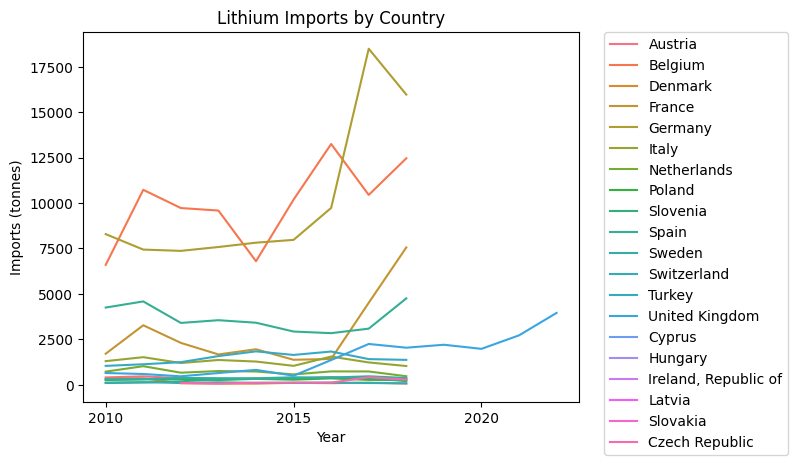

In [190]:
# Create a line plot
sns.lineplot(x="year", y="quantity", hue="country_trans", data=grouped_data)

plt.title("Lithium Imports by Country")
plt.xlabel("Year")
plt.ylabel("Imports (tonnes)")
plt.legend(title="Country")
# Place legend outside the chart on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Set x-axis ticks to every 5th year
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()